## Some Simple Classification
#### Mainly to get used to working in tf
heavily influenced by [this tf/keras tutorial](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
label_names = ['tshirt','pants','pullover','dress','jacket','sandal','shirt','sneaker','bag','ankle boot']

In [6]:
print(train_imgs.shape, len(train_labels))

(60000, 28, 28) 60000


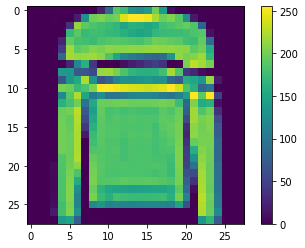

In [7]:
plt.figure()
plt.imshow(train_imgs[5])
plt.grid(False)
plt.colorbar()
plt.show()

In [8]:
# need to scale values to in between 0 and 1

train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

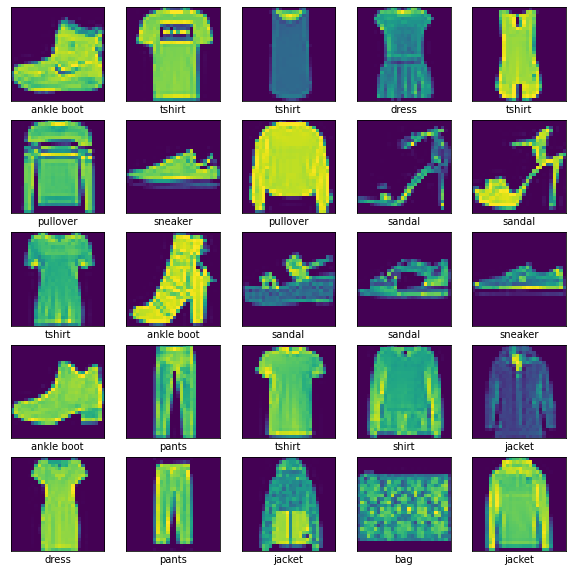

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_imgs[i])
    plt.xlabel(label_names[train_labels[i]])

plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_imgs, train_labels, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2004 - accuracy: 0.9237
Epoch 2/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1928 - accuracy: 0.9275
Epoch 3/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1900 - accuracy: 0.9286
Epoch 4/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1828 - accuracy: 0.9318
Epoch 5/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1782 - accuracy: 0.9327
Epoch 6/15
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1747 - accuracy: 0.9341
Epoch 7/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1709 - accuracy: 0.9363
Epoch 8/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1666 - accuracy: 0.9367
Epoch 9/15
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1628 - accuracy: 0.9378
Epoch 10/15
60

In [16]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels, verbose=2)

10000/1 - 0s - loss: 0.5097 - accuracy: 0.8817


In [17]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_imgs)

In [22]:
# straight from the tutorial

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(label_names[predicted_label],
                                100*np.max(predictions_array),
                                label_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

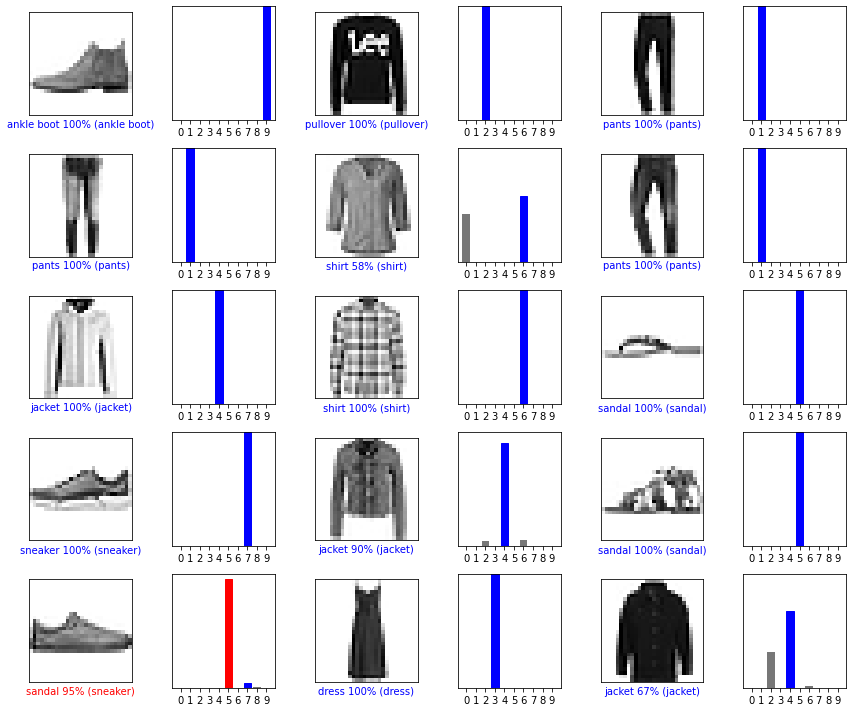

In [23]:
# also straight from the tutorial

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()